In [ ]:
import numpy as np
import os
import cv2
import shutil
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import shutil
import os
import pathlib
from keras.preprocessing import image
from google.colab import files


In [ ]:
# Define the source directory containing your dataset
source_dir = "/content/drive/MyDrive/Project/Alexander mamaev/flowers"
# Define the destination directory where you want to extract the dataset
destination_dir = "/content/flowers"

# Copy the files from the source directory to the destination directory
shutil.copytree(source_dir, destination_dir)

# Convert the destination directory path to a pathlib.Path object
data_dir = pathlib.Path(destination_dir)
# Print the contents of the data directory to verify
print(os.listdir(data_dir))

['rose', 'dandelion', 'sunflower', 'tulip', 'daisy']


In [ ]:
# Load and prepare the dataset
data = []
labels = []
class_names = os.listdir(data_dir)
num_classes = len(class_names)
img_height = 180
img_width = 180

for class_name in class_names:
    class_dir = data_dir / class_name
    for img_path in class_dir.glob("*.jpg"):
        img = cv2.imread(str(img_path))
        img = cv2.resize(img, (img_height, img_width))
        data.append(img)
        labels.append(class_names.index(class_name))


In [ ]:
data = np.array(data)
labels = np.array(labels)


In [ ]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=123)


In [ ]:
# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


In [ ]:
# SVM model
svm_model = svm.SVC(kernel='linear', C=1.0)
svm_model.fit(x_train_flat, y_train)


SVC(kernel='linear')

In [ ]:
# Evaluation
train_acc = svm_model.score(x_train_flat, y_train)
test_acc = svm_model.score(x_test_flat, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9991311902693311
Testing Accuracy: 0.39699074074074076


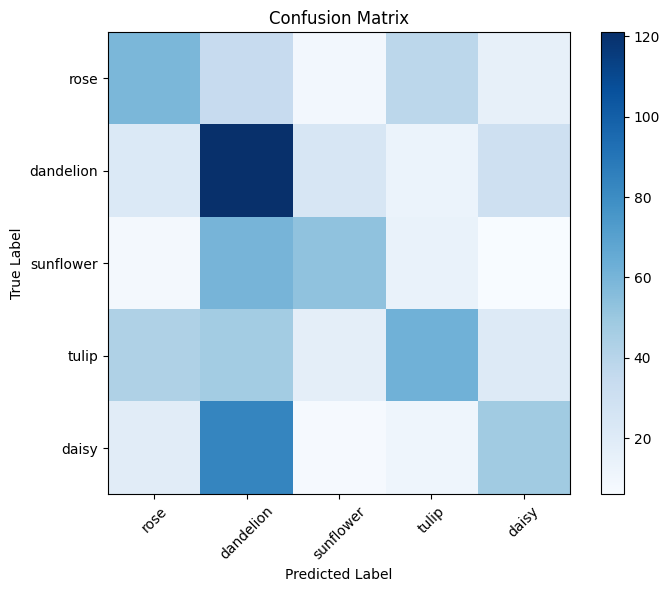

In [ ]:
# Plot confusion matrix
predictions = svm_model.predict(x_test_flat)
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Upload an image for prediction
uploaded = files.upload()


In [ ]:
for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(180, 180))

  x = image.img_to_array(img)
  test_img = np.expand_dims(x, axis=0)

  result = svm_model.predict(test_img)
  pred = np.argmax(result) # get the index of max value

  # Display uploaded image
  plt.imshow(img)
  plt.axis('off')
  plt.title('Uploaded Image')
  plt.show()

  # Print predicted class name
  print("Predicted Flower Class:", class_names[pred])